# Compressor Analytics Dataset

Below are a few things to get you started with the Compressor Analytics dataset for AIHack! For more information see [here](https://drive.google.com/file/d/1ojYVHpabfkNz45nQqQLenyoaQbCmWdo4/view?usp=sharing).

In [0]:
# Download data - please only run this once
import urllib.request
import zipfile
import os

print("Starting download ...")
urls = [
    "https://github.com/aihack20/shell_challenge/releases/download/data/clean_dataset.zip",
    "https://github.com/aihack20/shell_challenge/releases/download/data/raw_dataset.zip",
]
os.makedirs("shell_data", exist_ok=True)
for url in urls:
    with urllib.request.urlopen(url) as src:
        with open("tmp.zip", "wb") as dest:
            dest.write(src.read())
    print("Unpacking archive ...")
    with zipfile.ZipFile("tmp.zip") as f:
        f.extractall("shell_data")
print("Done!")

Starting download ...
Unpacking archive ...
Unpacking archive ...
Done!


In [0]:
%pip install pandas matplotlib

In [0]:
# Load the data (will take a short while)
clean_data = pd.read_csv("shell_data/clean_dataset.csv")
raw_data = pd.read_csv("shell_data/raw_dataset.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

## Your Hack ...

In [0]:
np.shape(clean_data)
import pandas as pd
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import numpy as np
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import RobustScaler

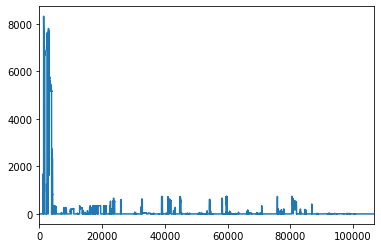

In [0]:
clean_data = pd.read_csv("shell_data/clean_dataset.csv")
clean_data.iloc[:, 191].plot()

In [0]:
clean_data = pd.read_csv("shell_data/clean_dataset.csv")
del clean_data['original_index']
clean_tranformer = RobustScaler().fit(clean_data.dropna())
clean_data = clean_tranformer.transform(clean_data.dropna())
# clean_data = normalize(clean_data.dropna(), norm="l2")
np.shape(clean_data)
clean_data

array([[-0.25180081,  1.00605854,  1.00006017, ...,  1.479719  ,
         1.72276952,  1.24289256],
       [-0.25655481,  1.04416187,  1.02320459, ...,  1.50161246,
         1.73475671,  1.26830981],
       [-0.24304426,  0.99620465,  0.97900655, ...,  1.47551703,
         1.72137862,  1.27572531],
       ...,
       [ 0.55549676,  1.03095578,  1.01780521, ...,  1.78486915,
        -1.15651777, -1.13141949],
       [ 0.55616179,  1.05348342,  1.01718488, ...,  1.78709723,
        -1.15226673, -1.13141949],
       [ 0.54327081,  1.04051399,  1.01407245, ...,  1.7776645 ,
        -1.15751806, -1.13141949]])

In [0]:
anomaly_index_original = [10634, 36136, 57280, 57618, 60545, 63144, 118665, 128524, 131118]
new_clean_data = pd.read_csv("shell_data/clean_dataset.csv")
is_anomaly = new_clean_data[new_clean_data.original_index.isin(anomaly_index_original)]
print(is_anomaly)
clean_data_bis = is_anomaly
del clean_data_bis['original_index']
clean_data_bis = clean_tranformer.transform(clean_data_bis.dropna())
# clean_data_bis = normalize(clean_data_bis.dropna(), norm="l2")
print(clean_data_bis)

        Temperature Indicating 0  ...  original_index
9792                   76.871659  ...           10634
32303                  79.663810  ...           36136
47631                  68.033305  ...           57280
47848                  73.078974  ...           57618
50490                  78.592864  ...           60545
52689                  73.062356  ...           63144
95843                  94.739119  ...          118665
103531                 80.590390  ...          128524
105924                102.574190  ...          131118

[9 rows x 363 columns]
[[-2.55960385 -3.1485488  -5.19043803 ...  2.36646526  0.66213717
   2.09341382]
 [-2.2232097  -3.09968602 -3.45438563 ... -0.43608357 -0.62984411
   8.84105109]
 [-3.62443556  1.36914658  1.66071375 ...  1.04129085  0.70625739
   0.14727796]
 ...
 [-0.40695905 -0.35703947 -0.38942518 ... -0.88797602 -0.47344146
  -0.56671545]
 [-2.11157668 -2.47251416 -2.66519017 ...  0.15431478 -1.16027156
  -1.13141949]
 [ 0.53699857  1.03498755 

In [0]:
# del clean_data['original_index']
pca = PCA()
pca.fit(clean_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(np.shape(pca.components_))

(362, 362)


In [0]:
pca_clean_data = np.dot(pca.components_[0:2], clean_data.T)
pca_clean_data_bis = np.dot(pca.components_[0:2], clean_data_bis.T)

In [0]:
pca.components_[2].max()/np.sum(pca.components_[2])

0.42475008433555905

In [0]:
np.argmax(pca.components_[2])

213

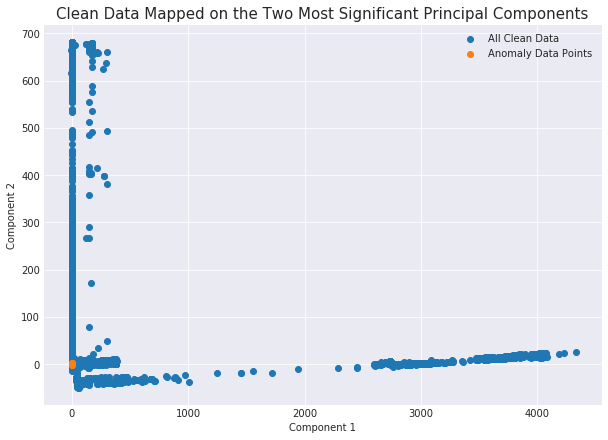

In [0]:
plt.figure(figsize=(10,7))
with plt.style.context('seaborn-darkgrid'):
  plt.title("Clean Data Mapped on the Two Most Significant Principal Components", fontsize=15)
  plt.xlabel("Component 1")
  plt.ylabel("Component 2")
  plt.scatter(pca_clean_data[0], pca_clean_data[1], label="All Clean Data")
  plt.scatter(pca_clean_data_bis[0], pca_clean_data_bis[1], label="Anomaly Data Points")
  plt.legend()
plt.show()

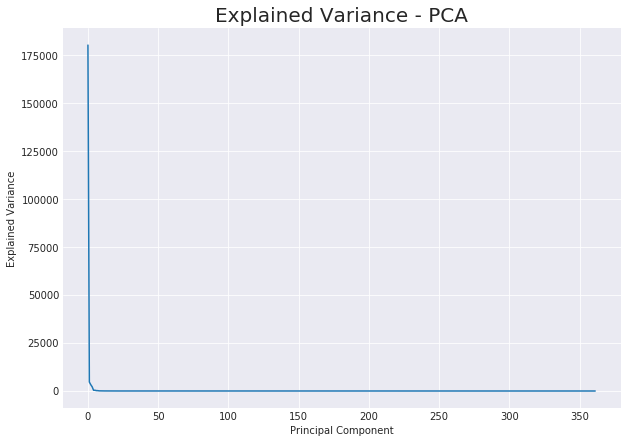

In [0]:
plt.figure(figsize=(10,7))
with plt.style.context('seaborn-darkgrid'): 
  plt.title("Explained Variance - PCA", fontsize=20)
  plt.xlabel("Principal Component")
  plt.ylabel("Explained Variance")
  plt.plot(pca.explained_variance_)
plt.show()

In [0]:
sum = 0
cumulative_sum_singular_values = []
for i in range(len(pca.singular_values_)):
  sum += pca.singular_values_[i]
  cumulative_sum_singular_values.append(sum)
cumulative_sum_singular_values = cumulative_sum_singular_values/cumulative_sum_singular_values[-1]*100

In [0]:
index = -1
for i in range(1, len(cumulative_sum_singular_values)):
  if (cumulative_sum_singular_values[i] > cumulative_sum_singular_values[-1]*0.95):
    index = i
    break
print(index)

73


In [0]:
cumulative_sum_singular_values[2]/cumulative_sum_singular_values[-1]*100

64.13846392751412

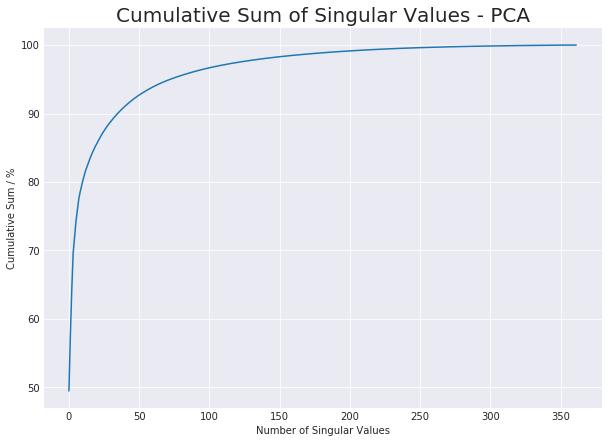

In [0]:
plt.figure(figsize=(10,7))
with plt.style.context('seaborn-darkgrid'): 
  plt.title("Cumulative Sum of Singular Values - PCA", fontsize=20)
  plt.xlabel("Number of Singular Values")
  plt.ylabel("Cumulative Sum / %")
  plt.plot(cumulative_sum_singular_values)
plt.show()